In [1]:
# ================================
# 🩺 Health Insurance Fraud Detection
# 📌 Step 1: Import Required Libraries (without seaborn)
# ================================

# Data manipulation
import pandas as pd
import numpy as np
import time
import random
import string
# Data visualization
import matplotlib.pyplot as plt

# Model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)

# System and warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings for clarity
pd.set_option('display.max_columns', None)


In [2]:
# Load the datasets into DataFrames
main_claim_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train-1542865627584.csv")
beneficiary_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Beneficiarydata-1542865627584.csv")
inpatient_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Inpatientdata-1542865627584.csv")
outpatient_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Outpatientdata-1542865627584.csv")

# Display top rows to confirm successful loading
print("✅ Main Claim Data:")
display(main_claim_df.head())

print("✅ Beneficiary Data:")
display(beneficiary_df.head())

print("✅ Inpatient Data:")
display(inpatient_df.head())

print("✅ Outpatient Data:")
display(outpatient_df.head())

# Check data shapes for clarity
print(f"Main Claim Shape: {main_claim_df.shape}")  #(row , column)
print(f"Beneficiary Shape: {beneficiary_df.shape}") #(row , column)
print(f"Inpatient Shape: {inpatient_df.shape}") #(row , column)
print(f"Outpatient Shape: {outpatient_df.shape}") #(row , column)

✅ Main Claim Data:


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


✅ Beneficiary Data:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


✅ Inpatient Data:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


✅ Outpatient Data:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


Main Claim Shape: (5410, 2)
Beneficiary Shape: (138556, 25)
Inpatient Shape: (40474, 30)
Outpatient Shape: (517737, 27)


In [12]:
#Exploratory Data Analysis (EDA)

In [13]:
print("Check Target Variable Distribution")
print(main_claim_df['PotentialFraud'].value_counts())

Check Target Variable Distribution
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


In [14]:
main_claim_df['FraudLabel'] = main_claim_df['PotentialFraud'].map({'Yes': 1, 'No': 0})

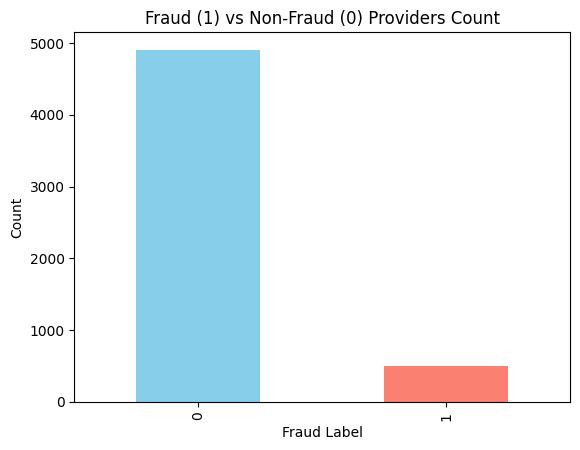

In [15]:
# Simple bar plot of target variable
main_claim_df['FraudLabel'].value_counts().plot(
    kind='bar',
    title='Fraud (1) vs Non-Fraud (0) Providers Count',
    xlabel='Fraud Label',
    ylabel='Count',
    color=['skyblue', 'salmon']
)
plt.show()

In [16]:
# Check missing values in each dataset

In [17]:
print("\n Missing Values (Main Claim Data):")
print(main_claim_df.isnull().sum())


 Missing Values (Main Claim Data):
Provider          0
PotentialFraud    0
FraudLabel        0
dtype: int64


In [18]:
print("\n Missing Values (Beneficiary Data):")
print(beneficiary_df.isnull().sum())


 Missing Values (Beneficiary Data):
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                  

In [19]:
print("\n Missing values (Inpatient Data)")
print(inpatient_df.isnull().sum())


 Missing values (Inpatient Data)
BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype:

In [20]:
print("\n Missing Values (Outpatient Data):")
print(outpatient_df.isnull().sum())


 Missing Values (Outpatient Data):
BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64


In [21]:
# Preview basic descriptive statistics
print("\n Descriptive Statistics (Main Claim Data):")
display(main_claim_df.describe())


 Descriptive Statistics (Main Claim Data):


,FraudLabel
count,5410.000000
mean,0.093530
std,0.291201
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
print("\n Descriptive Statistics (Beneficiary Data):")
display(beneficiary_df.describe())


 Descriptive Statistics (Beneficiary Data):


,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [23]:
# checks if there are more than 1 numeric columns before plotting a correlation heatmap

In [24]:
if main_claim_df.select_dtypes(include=[np.number]).shape[1] > 1:
    corr = main_claim_df.corr()
    plt.figure(figsize=(6, 4))
    plt.imshow(corr, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.title('Correlation Heatmap (Main Claim Data)')
    plt.show()

In [25]:
#  Exploratory Data Analysis (EDA) - Beneficiary Data

In [26]:
#preview data
print("\n Beneficiary Data Preview")
display(beneficiary_df.head())


 Beneficiary Data Preview


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [27]:
# Data info and missing values
print("\n Beneficiary Data Info:")
print(beneficiary_df.info())


 Beneficiary Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int

In [28]:
print("\n Missing Values in Beneficiary Data:")
print(beneficiary_df.isnull().sum())


 Missing Values in Beneficiary Data:
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                 

In [29]:
# Gender and Race Distribution
gender_counts = beneficiary_df['Gender'].value_counts().sort_index()
race_counts = beneficiary_df['Race'].value_counts().sort_index()

Text(0, 0.5, 'Count')

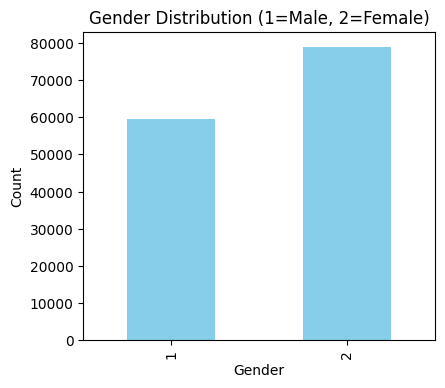

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution (1=Male, 2=Female)')
plt.xlabel('Gender')
plt.ylabel('Count')

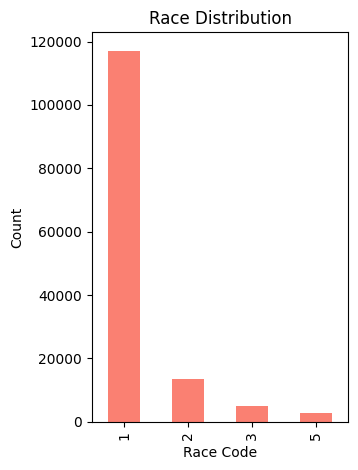

In [31]:
plt.subplot(1, 2, 2)
race_counts.plot(kind='bar', color='salmon')
plt.title('Race Distribution')
plt.xlabel('Race Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

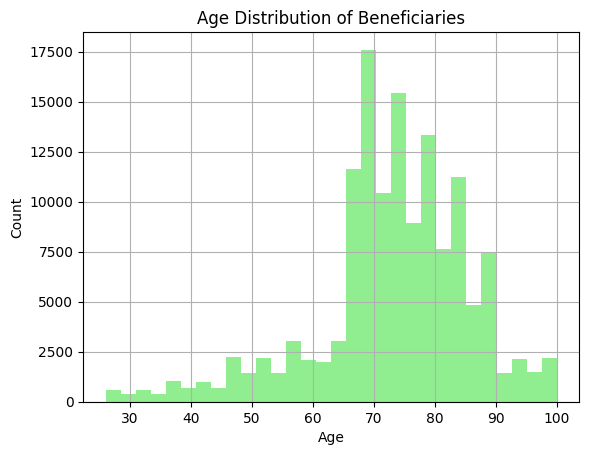

In [32]:
# Age Distribution
beneficiary_df['DOB'] = pd.to_datetime(beneficiary_df['DOB'], errors='coerce')
beneficiary_df['Age'] = 2009 - beneficiary_df['DOB'].dt.year  # using 2009 as reference year
beneficiary_df['Age'].hist(bins=30, color='lightgreen')
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [33]:
print("\n Age Statistics:")
print(beneficiary_df['Age'].describe())


 Age Statistics:
count    138556.000000
mean         73.128663
std          12.724354
min          26.000000
25%          68.000000
50%          74.000000
75%          81.000000
max         100.000000
Name: Age, dtype: float64


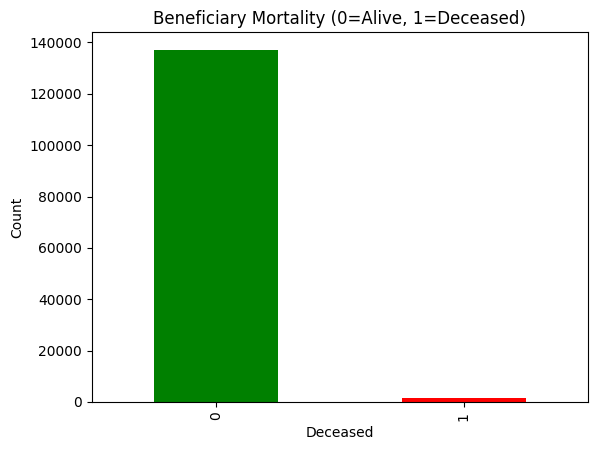

In [34]:
#Mortality Analysis (DOD column)
beneficiary_df['Deceased'] = beneficiary_df['DOD'].notnull().astype(int)
deceased_counts = beneficiary_df['Deceased'].value_counts()
deceased_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Beneficiary Mortality (0=Alive, 1=Deceased)')
plt.xlabel('Deceased')
plt.ylabel('Count')
plt.show()

In [35]:
print("\n Deceased Counts:")
print(deceased_counts)


 Deceased Counts:
Deceased
0    137135
1      1421
Name: count, dtype: int64


In [36]:
#Chronic Condition Analysis

In [37]:
chronic_cols = [col for col in beneficiary_df.columns if 'ChronicCond' in col]
print("\n Chronic Condition Distributions:")
for col in chronic_cols:
    print(f"\n{col} Value Counts:\n{beneficiary_df[col].value_counts()}")


 Chronic Condition Distributions:

ChronicCond_Alzheimer Value Counts:
ChronicCond_Alzheimer
2    92530
1    46026
Name: count, dtype: int64

ChronicCond_Heartfailure Value Counts:
ChronicCond_Heartfailure
2    70154
1    68402
Name: count, dtype: int64

ChronicCond_KidneyDisease Value Counts:
ChronicCond_KidneyDisease
2    95277
1    43279
Name: count, dtype: int64

ChronicCond_Cancer Value Counts:
ChronicCond_Cancer
2    121935
1     16621
Name: count, dtype: int64

ChronicCond_ObstrPulmonary Value Counts:
ChronicCond_ObstrPulmonary
2    105697
1     32859
Name: count, dtype: int64

ChronicCond_Depression Value Counts:
ChronicCond_Depression
2    89296
1    49260
Name: count, dtype: int64

ChronicCond_Diabetes Value Counts:
ChronicCond_Diabetes
1    83391
2    55165
Name: count, dtype: int64

ChronicCond_IschemicHeart Value Counts:
ChronicCond_IschemicHeart
1    93644
2    44912
Name: count, dtype: int64

ChronicCond_Osteoporasis Value Counts:
ChronicCond_Osteoporasis
2    100497
1 

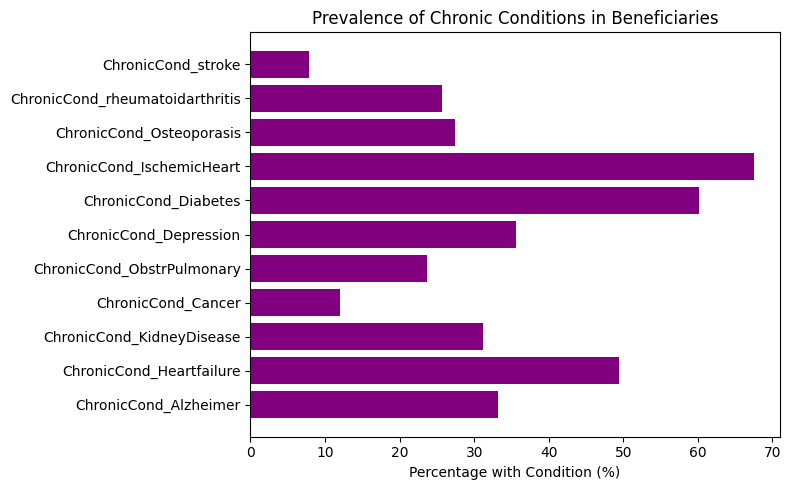

In [38]:
# Bar plot for % with each condition
chronic_percentages = {}
for col in chronic_cols:
    chronic_percentages[col] = (beneficiary_df[col] == 1).mean() * 100
plt.figure(figsize=(8,5))
plt.barh(list(chronic_percentages.keys()), list(chronic_percentages.values()), color='purple')
plt.xlabel('Percentage with Condition (%)')
plt.title('Prevalence of Chronic Conditions in Beneficiaries')
plt.tight_layout()
plt.show()

In [39]:
#Exploratory Data Analysis (EDA) - Inpatient Data

In [40]:
# Preview data
print("\n Inpatient Data Preview:")
display(inpatient_df.head())


 Inpatient Data Preview:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [41]:
# Data info and missing values
print("\n Inpatient Data Info:")
print(inpatient_df.info())


 Inpatient Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCod

In [42]:
print("\n Missing Values in Inpatient Data:")
print(inpatient_df.isnull().sum())


 Missing Values in Inpatient Data:
BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtyp

In [43]:
# 3️⃣ Basic Descriptive Statistics
print("\n Descriptive Statistics for Numeric Columns:")
display(inpatient_df.describe())


 Descriptive Statistics for Numeric Columns:


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


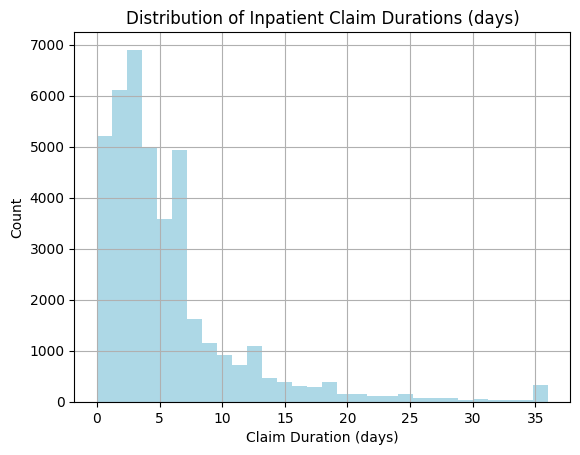

In [44]:
#Understanding Claim Duration
inpatient_df['ClaimStartDt'] = pd.to_datetime(inpatient_df['ClaimStartDt'], errors='coerce')
inpatient_df['ClaimEndDt'] = pd.to_datetime(inpatient_df['ClaimEndDt'], errors='coerce')
inpatient_df['ClaimDuration'] = (inpatient_df['ClaimEndDt'] - inpatient_df['ClaimStartDt']).dt.days
inpatient_df['ClaimDuration'].hist(bins=30, color='lightblue')
plt.title('Distribution of Inpatient Claim Durations (days)')
plt.xlabel('Claim Duration (days)')
plt.ylabel('Count')
plt.show()

In [45]:
print("\n Claim Duration Statistics:")
print(inpatient_df['ClaimDuration'].describe())


 Claim Duration Statistics:
count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: ClaimDuration, dtype: float64


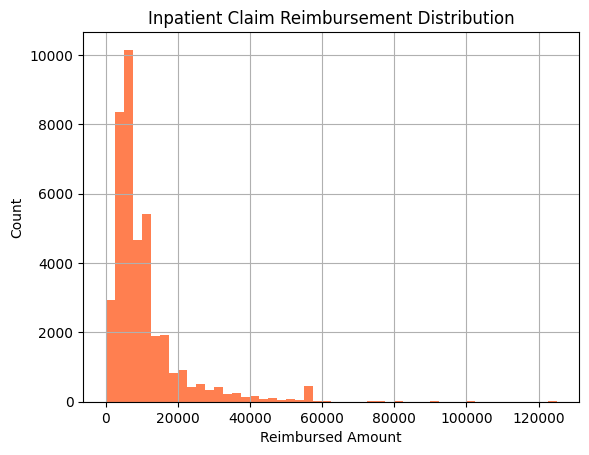

In [46]:
#  Reimbursement Distribution
inpatient_df['InscClaimAmtReimbursed'].hist(bins=50, color='coral')
plt.title('Inpatient Claim Reimbursement Distribution')
plt.xlabel('Reimbursed Amount')
plt.ylabel('Count')
plt.show()

In [47]:
print("\n Top Reimbursement Amounts:")
print(inpatient_df['InscClaimAmtReimbursed'].sort_values(ascending=False).head(10))


 Top Reimbursement Amounts:
708      125000
22893    125000
20124    125000
34034    125000
39514    125000
832      124000
5911     123000
4774     120000
32210    119000
27321    118000
Name: InscClaimAmtReimbursed, dtype: int64


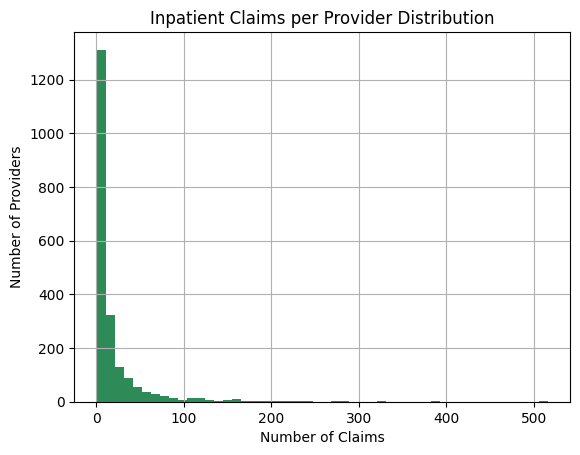

In [48]:
#  Claims Per Provider
claims_per_provider = inpatient_df['Provider'].value_counts()
claims_per_provider.hist(bins=50, color='seagreen')
plt.title('Inpatient Claims per Provider Distribution')
plt.xlabel('Number of Claims')
plt.ylabel('Number of Providers')
plt.show()

In [49]:
print("\n Providers with Highest Number of Inpatient Claims:")
print(claims_per_provider.head(10))


 Providers with Highest Number of Inpatient Claims:
Provider
PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
PRV56560    248
PRV54742    231
PRV55230    225
PRV52340    224
PRV51501    223
Name: count, dtype: int64


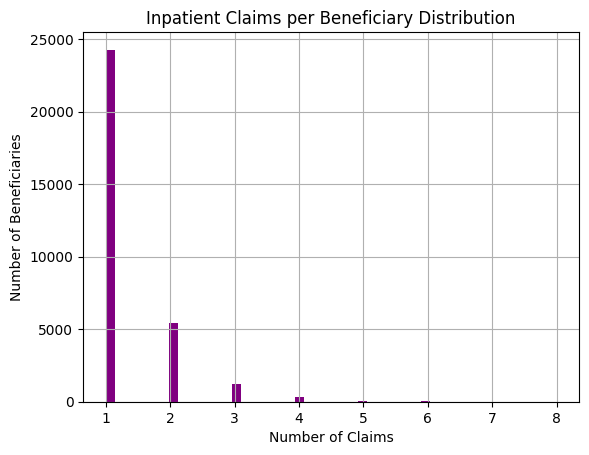

In [50]:
# Claims Per Beneficiary
claims_per_bene = inpatient_df['BeneID'].value_counts()
claims_per_bene.hist(bins=50, color='purple')
plt.title('Inpatient Claims per Beneficiary Distribution')
plt.xlabel('Number of Claims')
plt.ylabel('Number of Beneficiaries')
plt.show()

In [51]:
print("\n Beneficiaries with Highest Number of Inpatient Claims:")
print(claims_per_bene.head(10))


 Beneficiaries with Highest Number of Inpatient Claims:
BeneID
BENE134170    8
BENE117116    7
BENE62091     7
BENE64791     7
BENE121796    7
BENE119457    7
BENE49263     6
BENE120987    6
BENE86751     6
BENE31905     6
Name: count, dtype: int64


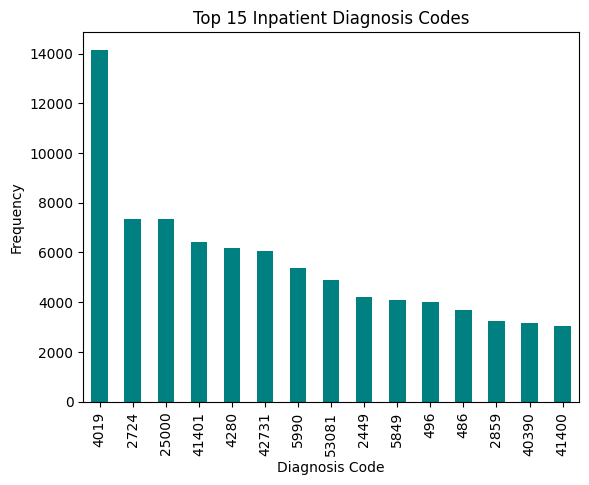

In [52]:
#Diagnosis and Procedure Code Analysis
diag_cols = [col for col in inpatient_df.columns if 'ClmDiagnosisCode' in col]
proc_cols = [col for col in inpatient_df.columns if 'ClmProcedureCode' in col]

# Diagnosis Codes
diag_codes = pd.Series(inpatient_df[diag_cols].values.ravel()).dropna()
top_diag = diag_codes.value_counts().head(15)
top_diag.plot(kind='bar', color='teal')
plt.title('Top 15 Inpatient Diagnosis Codes')
plt.xlabel('Diagnosis Code')
plt.ylabel('Frequency')
plt.show()

In [53]:
print("\n Top 15 Diagnosis Codes:")
print(top_diag)


 Top 15 Diagnosis Codes:
4019     14153
2724      7340
25000     7334
41401     6442
4280      6190
42731     6070
5990      5390
53081     4912
2449      4205
5849      4082
496       4000
486       3669
2859      3262
40390     3147
41400     3037
Name: count, dtype: int64


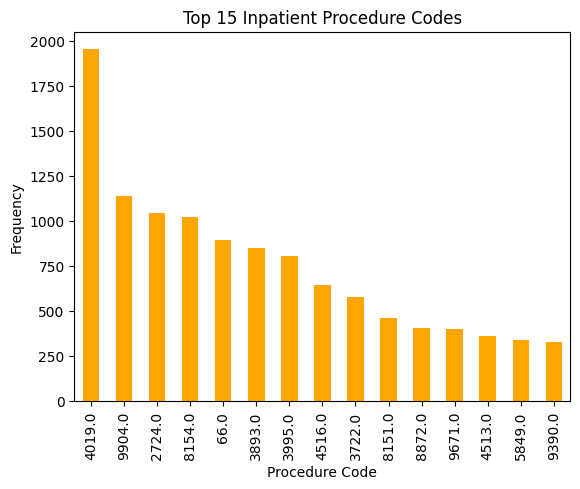

In [54]:
# Procedure Codes
proc_codes = pd.Series(inpatient_df[proc_cols].values.ravel()).dropna()
top_proc = proc_codes.value_counts().head(15)
top_proc.plot(kind='bar', color='orange')
plt.title('Top 15 Inpatient Procedure Codes')
plt.xlabel('Procedure Code')
plt.ylabel('Frequency')
plt.show()

In [55]:
print("\n Top 15 Procedure Codes:")
print(top_proc)


 Top 15 Procedure Codes:
4019.0    1953
9904.0    1137
2724.0    1047
8154.0    1021
66.0       894
3893.0     849
3995.0     805
4516.0     643
3722.0     581
8151.0     462
8872.0     409
9671.0     401
4513.0     362
5849.0     337
9390.0     330
Name: count, dtype: int64


In [56]:
# Exploratory Data Analysis (EDA) - Outpatient Data

In [57]:
#  Preview data
print("\n Outpatient Data Preview:")
display(outpatient_df.head())


 Outpatient Data Preview:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [58]:
# Data info and missing values
print("\n Outpatient Data Info:")
print(outpatient_df.info())


 Outpatient Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 

In [59]:
print("\n Missing Values in Outpatient Data:")
print(outpatient_df.isnull().sum())


 Missing Values in Outpatient Data:
BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64


In [60]:
# Descriptive statistics for numeric columns
print("\n Descriptive Statistics for Numeric Columns:")
display(outpatient_df.describe())


 Descriptive Statistics for Numeric Columns:


,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


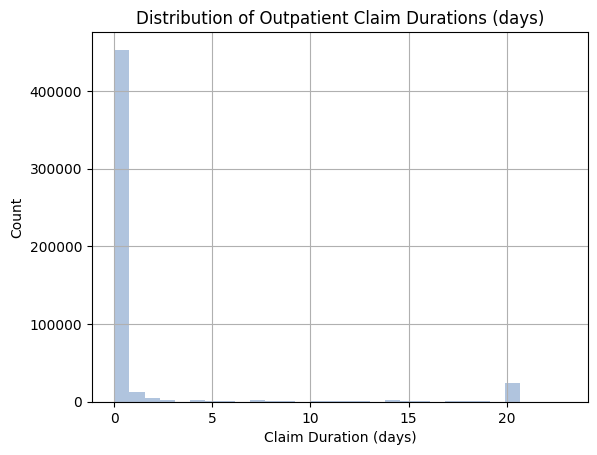

In [61]:
# Understanding Claim Duration
outpatient_df['ClaimStartDt'] = pd.to_datetime(outpatient_df['ClaimStartDt'], errors='coerce')
outpatient_df['ClaimEndDt'] = pd.to_datetime(outpatient_df['ClaimEndDt'], errors='coerce')
outpatient_df['ClaimDuration'] = (outpatient_df['ClaimEndDt'] - outpatient_df['ClaimStartDt']).dt.days

outpatient_df['ClaimDuration'].hist(bins=30, color='lightsteelblue')
plt.title('Distribution of Outpatient Claim Durations (days)')
plt.xlabel('Claim Duration (days)')
plt.ylabel('Count')
plt.show()


 Claim Duration Statistics:
count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: ClaimDuration, dtype: float64


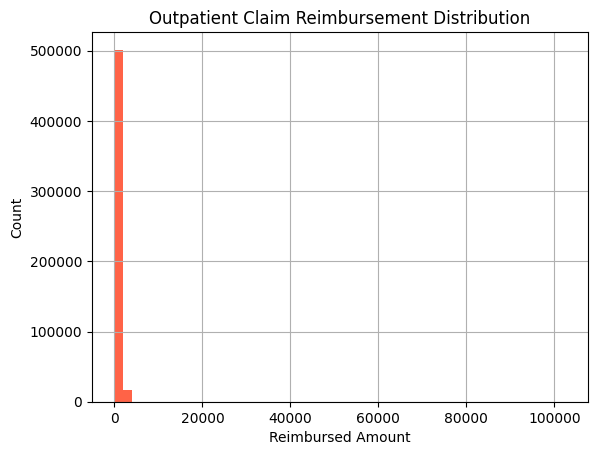

In [62]:
print("\n Claim Duration Statistics:")
print(outpatient_df['ClaimDuration'].describe())

# 5️⃣ Reimbursement distribution
outpatient_df['InscClaimAmtReimbursed'].hist(bins=50, color='tomato')
plt.title('Outpatient Claim Reimbursement Distribution')
plt.xlabel('Reimbursed Amount')
plt.ylabel('Count')
plt.show()


 Top Reimbursement Amounts:
9326      102500
505756    101250
349263     95580
232849     85680
341672     84660
50435      84460
418824     83160
227767     17300
317240     17300
237553     17300
Name: InscClaimAmtReimbursed, dtype: int64


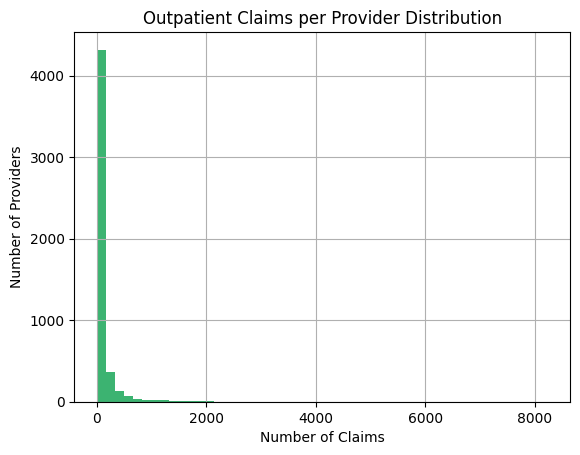

In [63]:
print("\n Top Reimbursement Amounts:")
print(outpatient_df['InscClaimAmtReimbursed'].sort_values(ascending=False).head(10))

# 6️⃣ Claims Per Provider
claims_per_provider_op = outpatient_df['Provider'].value_counts()
claims_per_provider_op.hist(bins=50, color='mediumseagreen')
plt.title('Outpatient Claims per Provider Distribution')
plt.xlabel('Number of Claims')
plt.ylabel('Number of Providers')
plt.show()

In [64]:
print("\n Providers with Highest Number of Outpatient Claims:")
print(claims_per_provider_op.head(10))


 Providers with Highest Number of Outpatient Claims:
Provider
PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3433
PRV55215    3250
PRV56011    2833
PRV52064    2806
PRV55004    2396
PRV57306    2315
Name: count, dtype: int64


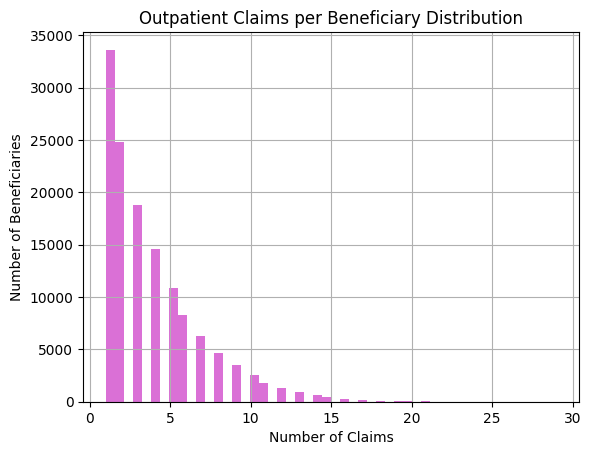

In [65]:
# Claims Per Beneficiary
claims_per_bene_op = outpatient_df['BeneID'].value_counts()
claims_per_bene_op.hist(bins=50, color='orchid')
plt.title('Outpatient Claims per Beneficiary Distribution')
plt.xlabel('Number of Claims')
plt.ylabel('Number of Beneficiaries')
plt.show()

In [66]:
print("\n Beneficiaries with Highest Number of Outpatient Claims:")
print(claims_per_bene_op.head(10))


 Beneficiaries with Highest Number of Outpatient Claims:
BeneID
BENE118316    29
BENE42721     29
BENE59303     27
BENE63544     27
BENE143400    27
BENE63504     27
BENE36330     26
BENE44241     26
BENE87248     25
BENE111593    25
Name: count, dtype: int64


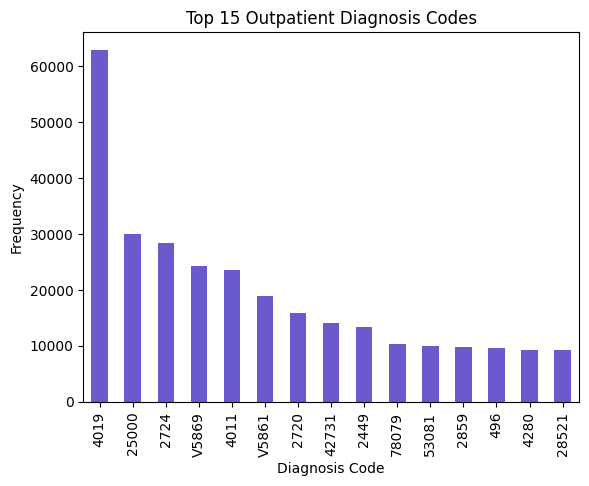

In [67]:
# Diagnosis and Procedure Code Analysis
diag_cols_op = [col for col in outpatient_df.columns if 'ClmDiagnosisCode' in col]
proc_cols_op = [col for col in outpatient_df.columns if 'ClmProcedureCode' in col]

# Diagnosis Codes
diag_codes_op = pd.Series(outpatient_df[diag_cols_op].values.ravel()).dropna()
top_diag_op = diag_codes_op.value_counts().head(15)
top_diag_op.plot(kind='bar', color='slateblue')
plt.title('Top 15 Outpatient Diagnosis Codes')
plt.xlabel('Diagnosis Code')
plt.ylabel('Frequency')
plt.show()

In [68]:
print("\n Top 15 Diagnosis Codes:")
print(top_diag_op)


 Top 15 Diagnosis Codes:
4019     62903
25000    30022
2724     28423
V5869    24359
4011     23534
V5861    18863
2720     15854
42731    14068
2449     13395
78079    10286
53081     9979
2859      9798
496       9659
4280      9317
28521     9192
Name: count, dtype: int64


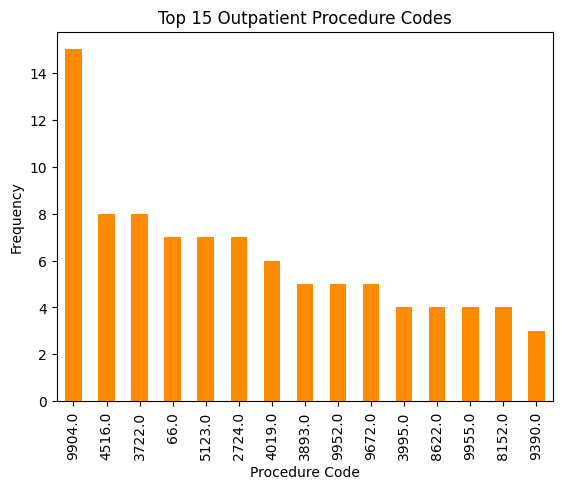

In [69]:
# Procedure Codes
proc_codes_op = pd.Series(outpatient_df[proc_cols_op].values.ravel()).dropna()
top_proc_op = proc_codes_op.value_counts().head(15)
top_proc_op.plot(kind='bar', color='darkorange')
plt.title('Top 15 Outpatient Procedure Codes')
plt.xlabel('Procedure Code')
plt.ylabel('Frequency')
plt.show()

In [70]:
print("\n Top 15 Procedure Codes:")
print(top_proc_op)


 Top 15 Procedure Codes:
9904.0    15
4516.0     8
3722.0     8
66.0       7
5123.0     7
2724.0     7
4019.0     6
3893.0     5
9952.0     5
9672.0     5
3995.0     4
8622.0     4
9955.0     4
8152.0     4
9390.0     3
Name: count, dtype: int64


In [71]:
# Data Merging

In [72]:
#Identify common columns between Outpatient and Inpatient datasets
common_cols = list(set(inpatient_df.columns).intersection(set(outpatient_df.columns)))
print("\n✅ Common Columns Between Inpatient and Outpatient Data:")
print(common_cols)


✅ Common Columns Between Inpatient and Outpatient Data:
['OtherPhysician', 'ClmProcedureCode_4', 'ClmProcedureCode_6', 'AttendingPhysician', 'OperatingPhysician', 'ClmDiagnosisCode_2', 'ClaimStartDt', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_3', 'ClaimID', 'ClmProcedureCode_5', 'ClmDiagnosisCode_4', 'ClmProcedureCode_2', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_9', 'DeductibleAmtPaid', 'Provider', 'ClaimDuration', 'ClmProcedureCode_1', 'ClmDiagnosisCode_3', 'BeneID', 'ClaimEndDt', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_10', 'InscClaimAmtReimbursed', 'ClmDiagnosisCode_5']


In [73]:
# Merge the Outpatient and Inpatient datasets
claims_df = pd.concat([inpatient_df[common_cols], outpatient_df[common_cols]], ignore_index=True)
print("\n✅ Combined Claims Data Shape:", claims_df.shape)



✅ Combined Claims Data Shape: (558211, 28)


In [74]:
# Preview merged claims
print("\n Combined Claims Data Preview:")
display(claims_df.head())


 Combined Claims Data Preview:


,OtherPhysician,ClmProcedureCode_4,ClmProcedureCode_6,AttendingPhysician,OperatingPhysician,ClmDiagnosisCode_2,ClaimStartDt,ClmAdmitDiagnosisCode,ClmProcedureCode_3,ClaimID,ClmProcedureCode_5,ClmDiagnosisCode_4,ClmProcedureCode_2,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_1,ClmDiagnosisCode_9,DeductibleAmtPaid,Provider,ClaimDuration,ClmProcedureCode_1,ClmDiagnosisCode_3,BeneID,ClaimEndDt,ClmDiagnosisCode_8,ClmDiagnosisCode_10,InscClaimAmtReimbursed,ClmDiagnosisCode_5
0,NaN,NaN,NaN,PHY390922,NaN,4019,2009-04-12,7866,NaN,CLM46614,NaN,7843,NaN,71590,2724,1970,5849,1068.0,PRV55912,6,NaN,5853,BENE11001,2009-04-18,19889,NaN,26000,2768
1,NaN,NaN,NaN,PHY318495,PHY318495,2948,2009-08-31,6186,NaN,CLM66048,NaN,NaN,NaN,NaN,NaN,6186,NaN,1068.0,PRV55907,2,7092.0,56400,BENE11001,2009-09-02,NaN,NaN,5000,NaN
2,PHY324689,NaN,NaN,PHY372395,NaN,30390,2009-09-17,29590,NaN,CLM68358,NaN,34590,NaN,32723,NaN,29623,NaN,1068.0,PRV56046,3,NaN,71690,BENE11001,2009-09-20,NaN,NaN,5000,V1581
3,PHY349768,NaN,NaN,PHY369659,PHY392961,2762,2009-02-14,431,NaN,CLM38412,NaN,32723,NaN,4254,25062,43491,4019,1068.0,PRV52405,8,331.0,7843,BENE11011,2009-02-22,40390,NaN,5000,V1041
4,NaN,NaN,NaN,PHY379376,PHY398258,3051,2009-08-13,78321,NaN,CLM63689,NaN,5856,NaN,486,5119,042,20300,1068.0,PRV56614,17,3893.0,34400,BENE11014,2009-08-30,29620,NaN,10000,42732


In [75]:
# Merge Claims Dataset with Beneficiary Dataset on 'BeneID'
# Ensure 'BeneID' in both datasets are of the same type
claims_df['BeneID'] = claims_df['BeneID'].astype(str)
beneficiary_df['BeneID'] = beneficiary_df['BeneID'].astype(str)

In [76]:
# Merge to enrich claims with patient demographics and chronic conditions
claims_merged_df = pd.merge(claims_df, beneficiary_df, on='BeneID', how='left')

In [77]:
print("\n Merged Claims with Beneficiary Data Shape:", claims_merged_df.shape)


 Merged Claims with Beneficiary Data Shape: (558211, 54)


In [78]:
# Preview merged claims with beneficiary details
print("\n Merged Claims with Beneficiary Data Preview:")
display(claims_merged_df.head())


 Merged Claims with Beneficiary Data Preview:


,OtherPhysician,ClmProcedureCode_4,ClmProcedureCode_6,AttendingPhysician,OperatingPhysician,ClmDiagnosisCode_2,ClaimStartDt,ClmAdmitDiagnosisCode,ClmProcedureCode_3,ClaimID,ClmProcedureCode_5,ClmDiagnosisCode_4,ClmProcedureCode_2,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_1,ClmDiagnosisCode_9,DeductibleAmtPaid,Provider,ClaimDuration,ClmProcedureCode_1,ClmDiagnosisCode_3,BeneID,ClaimEndDt,ClmDiagnosisCode_8,ClmDiagnosisCode_10,InscClaimAmtReimbursed,ClmDiagnosisCode_5,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,NaN,NaN,NaN,PHY390922,NaN,4019,2009-04-12,7866,NaN,CLM46614,NaN,7843,NaN,71590,2724,1970,5849,1068.0,PRV55912,6,NaN,5853,BENE11001,2009-04-18,19889,NaN,26000,2768,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66,0
1,NaN,NaN,NaN,PHY318495,PHY318495,2948,2009-08-31,6186,NaN,CLM66048,NaN,NaN,NaN,NaN,NaN,6186,NaN,1068.0,PRV55907,2,7092.0,56400,BENE11001,2009-09-02,NaN,NaN,5000,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66,0
2,PHY324689,NaN,NaN,PHY372395,NaN,30390,2009-09-17,29590,NaN,CLM68358,NaN,34590,NaN,32723,NaN,29623,NaN,1068.0,PRV56046,3,NaN,71690,BENE11001,2009-09-20,NaN,NaN,5000,V1581,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66,0
3,PHY349768,NaN,NaN,PHY369659,PHY392961,2762,2009-02-14,431,NaN,CLM38412,NaN,32723,NaN,4254,25062,43491,4019,1068.0,PRV52405,8,331.0,7843,BENE11011,2009-02-22,40390,NaN,5000,V1041,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,95,0
4,NaN,NaN,NaN,PHY379376,PHY398258,3051,2009-08-13,78321,NaN,CLM63689,NaN,5856,NaN,486,5119,042,20300,1068.0,PRV56614,17,3893.0,34400,BENE11014,2009-08-30,29620,NaN,10000,42732,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,71,0


In [79]:
#  Check for missing values after merge
print("\n Missing Values After Merging:")
print(claims_merged_df.isnull().sum())


 Missing Values After Merging:
OtherPhysician                     358475
ClmProcedureCode_4                 558093
ClmProcedureCode_6                 558211
AttendingPhysician                   1508
OperatingPhysician                 443764
ClmDiagnosisCode_2                 195606
ClaimStartDt                            0
ClmAdmitDiagnosisCode              412312
ClmProcedureCode_3                 557242
ClaimID                                 0
ClmProcedureCode_5                 558202
ClmDiagnosisCode_4                 393675
ClmProcedureCode_2                 552721
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_9                 516396
DeductibleAmtPaid                     899
Provider                                0
ClaimDuration                           0
ClmProcedureCode_1                 534901
ClmDiagnosisCode_3                 315156
BeneID                                  0
Cl

In [80]:
# Feature Engineering (Provider-level Aggregation)

In [81]:
# 1️Ensure datetime conversion
claims_merged_df['ClaimStartDt'] = pd.to_datetime(claims_merged_df['ClaimStartDt'], errors='coerce')
claims_merged_df['ClaimEndDt'] = pd.to_datetime(claims_merged_df['ClaimEndDt'], errors='coerce')
claims_merged_df['ClaimDuration'] = (claims_merged_df['ClaimEndDt'] - claims_merged_df['ClaimStartDt']).dt.days

#  Calculate age
claims_merged_df['DOB'] = pd.to_datetime(claims_merged_df['DOB'], errors='coerce')
claims_merged_df['Age'] = 2009 - claims_merged_df['DOB'].dt.year

#  Define chronic condition columns
chronic_cols = [col for col in claims_merged_df.columns if 'ChronicCond' in col]

# Create binary gender
claims_merged_df['is_male'] = (claims_merged_df['Gender'] == 1).astype(int)
claims_merged_df['is_female'] = (claims_merged_df['Gender'] == 2).astype(int)

#  Select relevant claim-level features
claim_level_df = claims_merged_df[[
    'Provider', 'ClaimID', 'BeneID',
    'InscClaimAmtReimbursed', 'ClaimDuration', 'Age', 'is_male', 'is_female'
] + chronic_cols].copy()

# Fill missing values
claim_level_df.fillna(0, inplace=True)


In [82]:
#  Preview
print("\nClaim-Level Feature Sample:")
display(claim_level_df.head())


Claim-Level Feature Sample:


,Provider,ClaimID,BeneID,InscClaimAmtReimbursed,ClaimDuration,Age,is_male,is_female,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,PRV55912,CLM46614,BENE11001,26000,6,66,1,0,1,2,1,2,2,1,1,1,2,1,1
1,PRV55907,CLM66048,BENE11001,5000,2,66,1,0,1,2,1,2,2,1,1,1,2,1,1
2,PRV56046,CLM68358,BENE11001,5000,3,66,1,0,1,2,1,2,2,1,1,1,2,1,1
3,PRV52405,CLM38412,BENE11011,5000,8,95,0,1,2,1,1,2,2,1,1,2,2,1,1
4,PRV56614,CLM63689,BENE11014,10000,17,71,0,1,2,1,1,2,1,1,2,1,2,2,2


In [83]:
print("\n Shape of Provider Features:", claim_level_df.shape)


 Shape of Provider Features: (558211, 19)


In [84]:
# Merging with Fraud Labels for Model Training

In [85]:
#  Ensure fraud label is encoded in main_claim_df (train data)
main_claim_df['FraudLabel'] = main_claim_df['PotentialFraud'].map({'Yes': 1, 'No': 0})

#  Merge fraud labels with claim-level features using 'Provider'
model_df = pd.merge(
    claim_level_df,
    main_claim_df[['Provider', 'FraudLabel']],
    on='Provider',
    how='left'  # keep all claims, even if label is missing
)

#  Fill any missing values (e.g., missing labels or features)
model_df.fillna(0, inplace=True)

#  Preview
print("\n Final Merged Model Data Preview (Claim-Level):")
display(model_df.head())



 Final Merged Model Data Preview (Claim-Level):


,Provider,ClaimID,BeneID,InscClaimAmtReimbursed,ClaimDuration,Age,is_male,is_female,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,FraudLabel
0,PRV55912,CLM46614,BENE11001,26000,6,66,1,0,1,2,1,2,2,1,1,1,2,1,1,1
1,PRV55907,CLM66048,BENE11001,5000,2,66,1,0,1,2,1,2,2,1,1,1,2,1,1,0
2,PRV56046,CLM68358,BENE11001,5000,3,66,1,0,1,2,1,2,2,1,1,1,2,1,1,0
3,PRV52405,CLM38412,BENE11011,5000,8,95,0,1,2,1,1,2,2,1,1,2,2,1,1,0
4,PRV56614,CLM63689,BENE11014,10000,17,71,0,1,2,1,1,2,1,1,2,1,2,2,2,0


In [86]:
# 1️⃣ Report the shape of the final dataset
print("\n Shape of Final Model Data:", model_df.shape)

# 2️⃣ Define X (features) and y (label)
# Exclude identifiers and target label
feature_cols = [col for col in model_df.columns if col not in ['Provider', 'ClaimID', 'BeneID', 'FraudLabel']]
X = model_df[feature_cols]
y = model_df['FraudLabel']

# 3️⃣ Quick preview
print("\n Feature Matrix (X) Preview:")
display(X.head())

print("\n Target Vector (y) Distribution:")
print(y.value_counts())


 Shape of Final Model Data: (558211, 20)

 Feature Matrix (X) Preview:


,InscClaimAmtReimbursed,ClaimDuration,Age,is_male,is_female,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,26000,6,66,1,0,1,2,1,2,2,1,1,1,2,1,1
1,5000,2,66,1,0,1,2,1,2,2,1,1,1,2,1,1
2,5000,3,66,1,0,1,2,1,2,2,1,1,1,2,1,1
3,5000,8,95,0,1,2,1,1,2,2,1,1,2,2,1,1
4,10000,17,71,0,1,2,1,1,2,1,1,2,1,2,2,2



 Target Vector (y) Distribution:
FraudLabel
0    345415
1    212796
Name: count, dtype: int64


In [87]:
print("\n Features Prepared for Modeling:")
print(feature_cols)


 Features Prepared for Modeling:
['InscClaimAmtReimbursed', 'ClaimDuration', 'Age', 'is_male', 'is_female', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']


In [88]:
 # Model Training & Evaluation - Random Forest

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

In [90]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [91]:
# Scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
# Train Logistic Regression
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)
logreg_preds = logreg.predict(X_test_scaled)
logreg_probs = logreg.predict_proba(X_test_scaled)[:, 1]

In [93]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

In [94]:
# Evaluation Metrics
print("\n Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_preds))


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.83      0.72     69083
           1       0.45      0.22      0.29     42560

    accuracy                           0.60    111643
   macro avg       0.54      0.53      0.51    111643
weighted avg       0.56      0.60      0.56    111643



In [95]:
print("\n Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))


 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69     69083
           1       0.47      0.43      0.45     42560

    accuracy                           0.60    111643
   macro avg       0.57      0.57      0.57    111643
weighted avg       0.59      0.60      0.60    111643



In [96]:
roc_auc_logreg = roc_auc_score(y_test, logreg_probs)
roc_auc_rf = roc_auc_score(y_test, rf_probs)
print(f" ROC-AUC Logistic Regression: {roc_auc_logreg:.4f}")
print(f" ROC-AUC Random Forest: {roc_auc_rf:.4f}")

 ROC-AUC Logistic Regression: 0.5338
 ROC-AUC Random Forest: 0.5990


In [97]:
# Plot ROC Curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

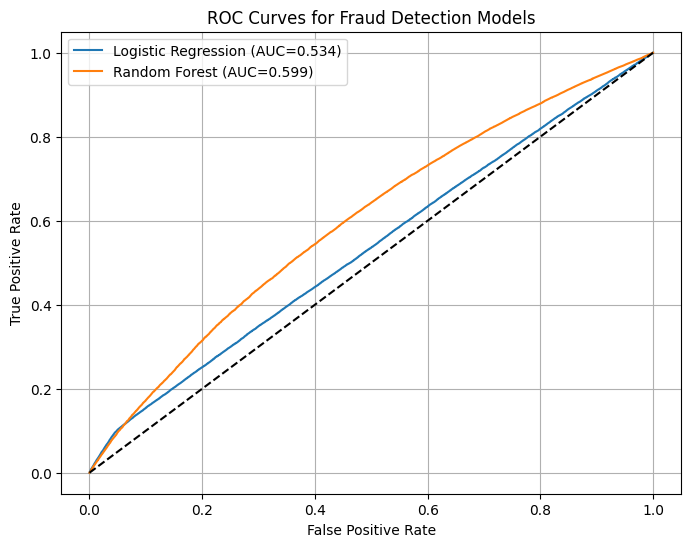

In [98]:
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC={roc_auc_logreg:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Fraud Detection Models")
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

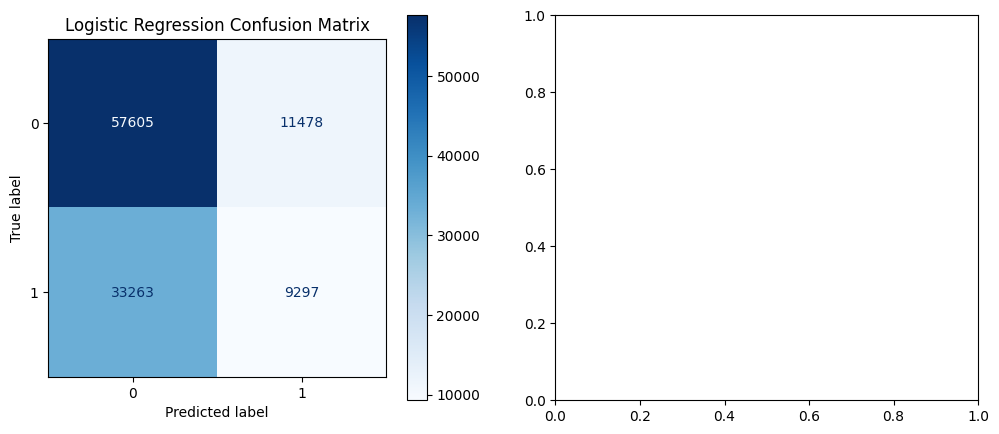

In [99]:
# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ConfusionMatrixDisplay.from_predictions(y_test, logreg_preds, ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression Confusion Matrix')

In [100]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, ax=ax[1], cmap='Greens')
ax[1].set_title('Random Forest Confusion Matrix')
plt.show()

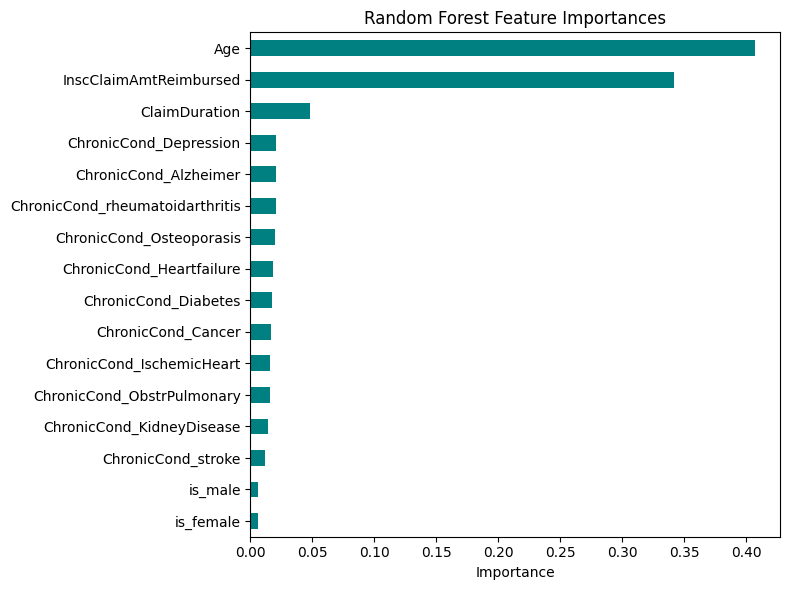

In [101]:
# Feature Importance for Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8,6))
importances.plot(kind='barh', color='teal')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [102]:
# Test Dataset Prediction using Trained Random Forest

In [103]:
# Load Test Datasets
test_main = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Test-1542969243754.csv")
test_beneficiary = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Test_Outpatientdata-1542969243754.csv")

In [104]:
def prepare_claim_level_features(main_df, beneficiary_df, inpatient_df, outpatient_df, is_train=True):
    """
    Generates claim-level features for fraud detection model training or testing.
    - is_train=True: merges fraud labels for training
    - is_train=False: skips fraud labels for testing
    """

    # 1️⃣ Merge Inpatient & Outpatient data on common columns
    common_cols = list(set(inpatient_df.columns).intersection(set(outpatient_df.columns)))
    claims_df = pd.concat([inpatient_df[common_cols], outpatient_df[common_cols]], ignore_index=True)

    # 2️⃣ Merge with Beneficiary data
    claims_df['BeneID'] = claims_df['BeneID'].astype(str)
    beneficiary_df['BeneID'] = beneficiary_df['BeneID'].astype(str)
    claims_df = pd.merge(claims_df, beneficiary_df, on='BeneID', how='left')

    # 3️⃣ Feature Engineering
    claims_df['ClaimStartDt'] = pd.to_datetime(claims_df['ClaimStartDt'], errors='coerce')
    claims_df['ClaimEndDt'] = pd.to_datetime(claims_df['ClaimEndDt'], errors='coerce')
    claims_df['ClaimDuration'] = (claims_df['ClaimEndDt'] - claims_df['ClaimStartDt']).dt.days

    # Calculate Age if not already present
    claims_df['DOB'] = pd.to_datetime(claims_df['DOB'], errors='coerce')
    claims_df['Age'] = 2009 - claims_df['DOB'].dt.year

    # Gender binary encoding
    claims_df['is_male'] = (claims_df['Gender'] == 1).astype(int)
    claims_df['is_female'] = (claims_df['Gender'] == 2).astype(int)

    # 4️⃣ Claim-Level Features (no aggregation!)
    chronic_cols = [col for col in claims_df.columns if 'ChronicCond' in col]
    selected_cols = [
        'Provider', 'ClaimID', 'BeneID', 'InscClaimAmtReimbursed', 'ClaimDuration',
        'Age', 'is_male', 'is_female'
    ] + chronic_cols

    claim_level_features = claims_df[selected_cols].copy()

    # 5️⃣ Merge with Fraud Labels if Training
    if is_train:
        main_df['FraudLabel'] = main_df['PotentialFraud'].map({'Yes': 1, 'No': 0})
        final_df = pd.merge(
            claim_level_features,
            main_df[['Provider', 'FraudLabel']],
            on='Provider',
            how='left'
        )
    else:
        final_df = claim_level_features.copy()

    # 6️⃣ Clean NaNs
    final_df.fillna(0, inplace=True)

    return final_df

In [105]:
test_df = prepare_claim_level_features(
    test_main, test_beneficiary, test_inpatient, test_outpatient, is_train=False
)
print(test_df.head())

   Provider   ClaimID     BeneID  InscClaimAmtReimbursed  ClaimDuration  Age  \
0  PRV57070  CLM67387  BENE11014                    9000              7   71   
1  PRV54750  CLM31237  BENE11017                   14000             14   69   
2  PRV53758  CLM78930  BENE11026                    2000              4   71   
3  PRV55825  CLM56810  BENE11031                   16000             13   65   
4  PRV52338  CLM34625  BENE11085                   19000             11   46   

   is_male  is_female  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0        0          1                      2                         1   
1        0          1                      1                         1   
2        1          0                      2                         2   
3        0          1                      2                         1   
4        0          1                      1                         1   

   ChronicCond_KidneyDisease  ChronicCond_Cancer  ChronicCond_ObstrPulmona

In [108]:
#  Ensure test features align with training
X_test_final = test_df[X_train.columns]  # Use same features as model was trained on

# Predict fraud labels and probabilities
test_df['PredictedFraud_RF'] = rf.predict(X_test_final)
test_df['FraudProbability_RF'] = rf.predict_proba(X_test_final)[:, 1]

# Create result DataFrame with essential columns
result_df = test_df[['Provider', 'ClaimID', 'PredictedFraud_RF', 'FraudProbability_RF']]

#  Export to CSV
result_df.to_csv("/home/mubasshir/Desktop/Research/Insurance/health-insurance-fraud-detection/result_datasets/RF_res.csv", index=False)

#  Preview
print("\n✅ Fraud Prediction Completed on Test Dataset. Top rows:")
display(result_df.head())



✅ Fraud Prediction Completed on Test Dataset. Top rows:


,Provider,ClaimID,PredictedFraud_RF,FraudProbability_RF
0,PRV57070,CLM67387,1,0.688665
1,PRV54750,CLM31237,0,0.440000
2,PRV53758,CLM78930,0,0.320000
3,PRV55825,CLM56810,1,0.540000
4,PRV52338,CLM34625,0,0.420000
